In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the data file

In [ ]:
df = pd.read_csv(r"C:\Users\Shubham\Desktop\Projects\Advertising.csv")

In [ ]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Let us look into the dataset more closely

In [ ]:
df.shape #It will describe the no. of columns and rows in the dataset

(200, 5)

In [ ]:
df.info() # It will tell about the datatypes of the various values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe() # It will give us the statistical description of the data

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.loc[df['radio']==0]

,Unnamed: 0,TV,radio,newspaper,sales
127,128,80.2,0.0,9.2,8.8


In [ ]:
df.isnull().sum() # Check for any null values in the dataset

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

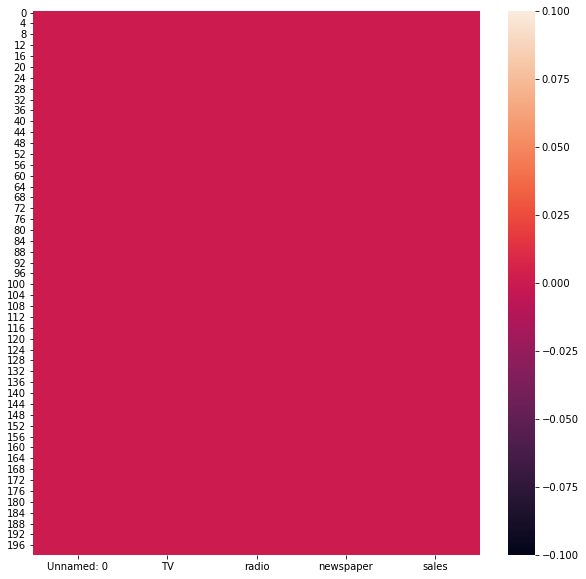

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

We can see that there are no null values in the dataset, also we understand the dataset through the description for any abnormality in the dataset. We can note that the first column of the dataset is simply an indexing and contribute nothing to the target value "sales" and hence we can drop the column

In [ ]:
df1 = df.drop("Unnamed: 0",axis=1)

Now, we have the dataset with us, let us look into the correlation matrix for the dataset

In [ ]:
df1.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
df1.corr()['sales'].sort_values() #Sorting the correlation for various columns to the target function sales

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

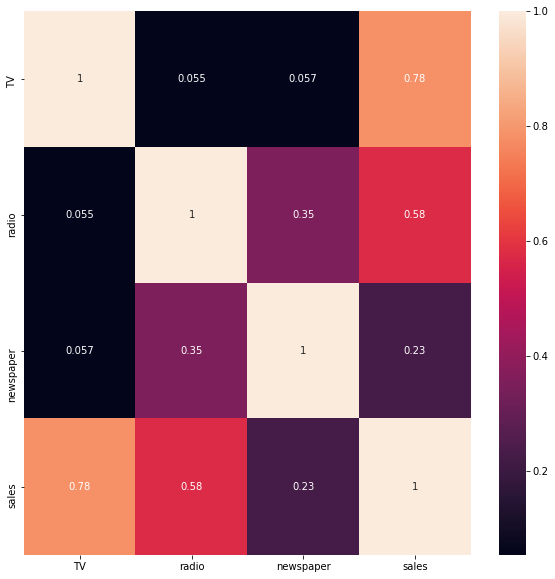

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

We note that TV has the highest correlation, then radio and finally newspaper for the least correlation to the target variable Sales.

Let us now look into each of the column seperately to look for outliers first. We will use for the boxplot and scatter plot to assess the data

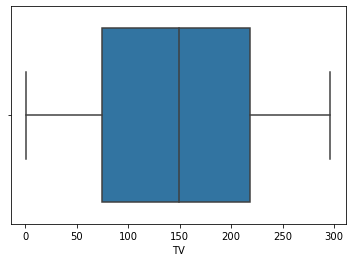

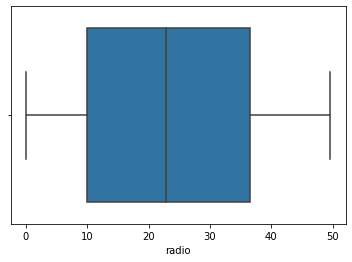

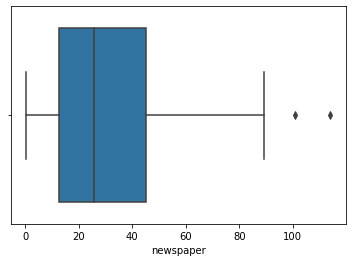

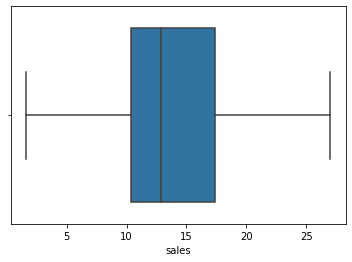

In [ ]:
import warnings
warnings.filterwarnings("ignore")

for i in df1.columns:
    sns.boxplot(df1[i])
    plt.show()

From the above data we can see a little outlier present in the newspaper column only. Let us look into the data through a more descriptive scatter plot

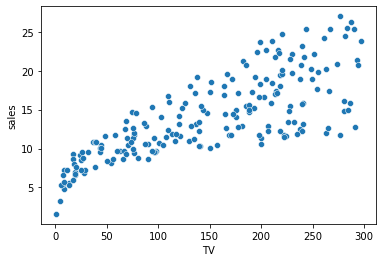

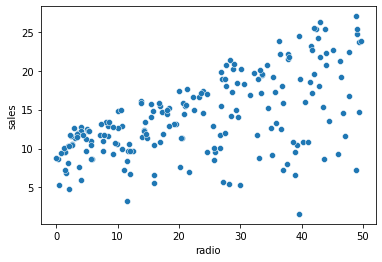

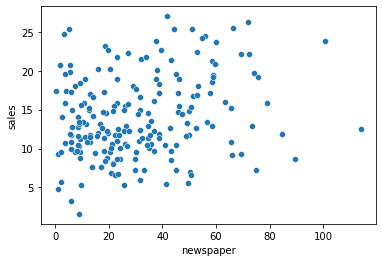

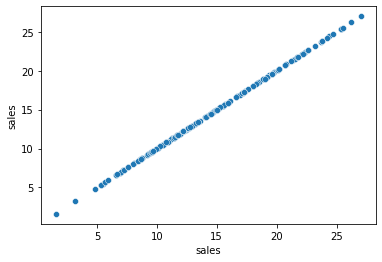

In [ ]:
for i in df1.columns:
    sns.scatterplot(df1[i], df1["sales"])
    plt.show()

From the above scatter plot we can see that TV has the highest investment and the return followed by the radio. However, newspaper has the least correlation and hence the lowest investment

Now, we have seen that there are very little outlier in the newspaper data. Let us still deal with the outlier using zscore method

In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(df1))

In [ ]:
z.shape

(200, 4)

We give the threshold value of +/-3 to remove the outliers

In [ ]:
df2=df1[(z<3).all(axis=1)]

Let us look into the new dataset formed

In [ ]:
df2.shape

(198, 4)

We have removed 2 rows from the original dataset while removing the outliers. Let us take a data visualisation for the new dataset

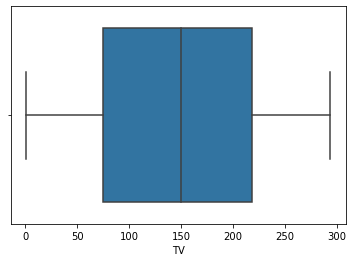

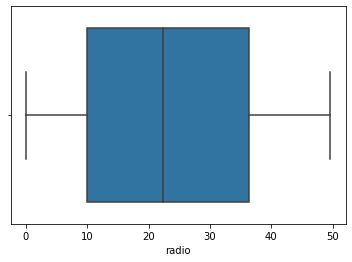

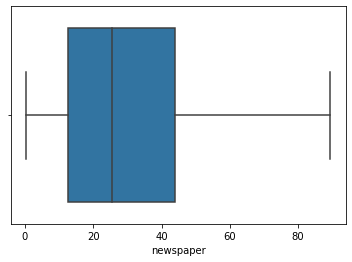

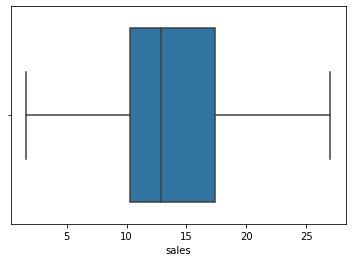

In [ ]:
for i in df2.columns:
    sns.boxplot(df2[i])
    plt.show()

We can note that we have removed all the outliers.

Now let us take a skewness check

In [ ]:
df2.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Taking a threshold of 0.5, we see that the newspaper data has skewness that we need to treat. But, before we do that let us take a better visualization for the data using histogram/density plot

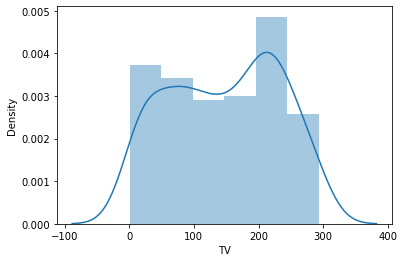

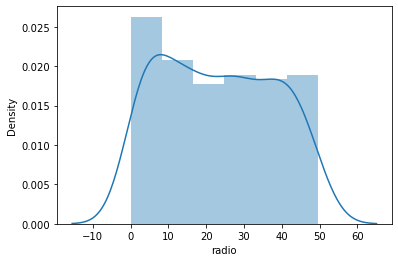

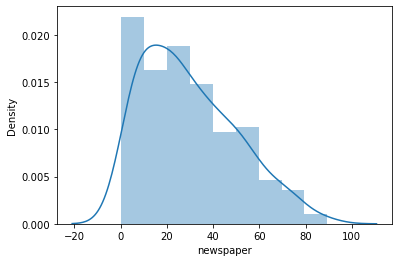

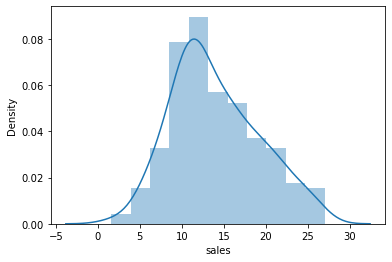

In [ ]:
for i in df2.columns:
    sns.distplot(df2[i])
    plt.show()

We can note a right side skewness to newspaper column. Let us treat it

In [ ]:
df2['newspaper']=np.sqrt(df['newspaper'])

In [ ]:
df2.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

Let us check for the skewness again after treatment

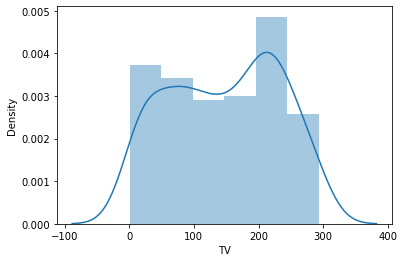

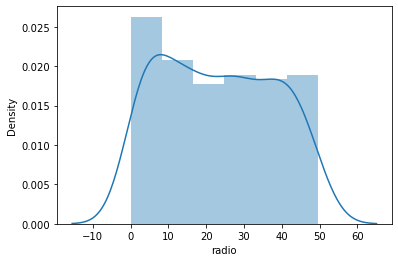

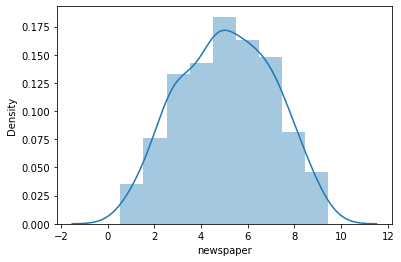

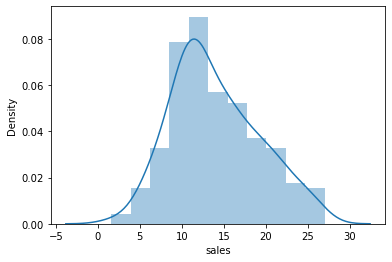

In [ ]:
for i in df2.columns:
    sns.distplot(df2[i])
    plt.show()

Spliting the data into target and feature values

In [ ]:
x = np.array(df2.iloc[:,:-1])
y = np.array(df2.iloc[:,-1])

We will scale the data first

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

Let us now find the best random state for model predictions

# Best Random State

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(pred, y_test)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.9475153733776146
Random State: 	 24


We found the value for the Random State at 24. Let us create the model for this

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=24)

# Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 94.70588911088107
Mean Square Error : 	 1.3622670478289258
Root Mean Square Error : 	 1.1671619629806849


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge()
rr.fit(x_train,y_train)
pred = rr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 94.72051519606156
Mean Square Error : 	 1.3585035010696314
Root Mean Square Error : 	 1.1655485837448525


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 97.66533505915238
Mean Square Error : 	 0.6007499999999999
Root Mean Square Error : 	 0.7750806409658287


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 98.13022368528756
Mean Square Error : 	 0.4811260499999969
Root Mean Square Error : 	 0.6936325035636645


# KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 96.57963327883677
Mean Square Error : 	 0.8801200000000013
Root Mean Square Error : 	 0.9381471099992801


# SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 95.15272495678433
Mean Square Error : 	 1.247288392977957
Root Mean Square Error : 	 1.1168206628541384


Out of all the models 'Random Forest Regressor' has the highest r2_score

# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Linear Regression is: \t", scr1.mean())

Cross validation score of Linear Regression is: 	 0.8857406146589943


In [ ]:
scr2 = cross_val_score(rr, x, y, cv=5)
print("Cross validation score of Ridge Regression is: \t", scr2.mean())

Cross validation score of Ridge Regression is: 	 0.8858278340182535


In [ ]:
scr3 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree Regressor is: \t", scr3.mean())

Cross validation score of Decision Tree Regressor is: 	 0.9547438314077035


In [ ]:
scr4 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest Regressor is: \t", scr4.mean())

Cross validation score of Random Forest Regressor is: 	 0.9745981855628163


In [ ]:
scr5 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNeighbour Regressor is: \t", scr5.mean())

Cross validation score of KNeighbour Regressor is: 	 0.9358043941034188


In [ ]:
scr6 = cross_val_score(svr, x, y, cv=5)
print("Cross validation score of SVM is: \t", scr6.mean())

Cross validation score of SVM is: 	 0.9041170072126675


Out of all the crossvalidations, Random Forest Regressor performs the best

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

In [ ]:
gcv=GridSearchCV(rf,parameters,cv=5,scoring='r2')

In [ ]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [ ]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy : 0.9718568211580634


Accuracy of 97% is good, we move on

# Saving the best model

In [ ]:
import joblib
joblib.dump(gcv.best_estimator_,"advertising.pkl")

['advertising.pkl']